<a href="https://colab.research.google.com/github/arthurantonio/DatasetVendas/blob/main/DesafioArthur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(1)

##Importação e tratamento básico

In [12]:
data = pd.read_csv('Dataset.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head()

Número de linhas e colunas: (200, 6)


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1


In [13]:
#Vereficando dados ausentes
data[data.isna().any(axis=1)]

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
100,37.0,70000.0,Masculino,22.378614,NaN,0
101,NaN,30000.0,Feminino,15.107969,Sim,0
102,28.0,NaN,Masculino,15.704990,Não,0
107,NaN,50000.0,Masculino,-1.000000,Sim,0
112,31.0,70000.0,Masculino,7.141456,NaN,0
114,35.0,30000.0,Feminino,9.796683,NaN,1
122,NaN,50000.0,Feminino,10.842802,Não,0
124,NaN,30000.0,Feminino,27.001977,Sim,0
126,23.0,30000.0,NaN,18.323945,Não,0
129,39.0,NaN,Masculino,21.737174,NaN,1


In [14]:
#Optei por excluir os dados faltantes de Gênero, anúncio e renda (por serem categoricos)
data = data.dropna(subset=['Gênero', 'Anúncio Clicado', 'Renda Anual (em $)'])

#idade substitui pela mediana, para perder um número menor de dados
data.loc[:, 'Idade'] = data['Idade'].fillna(data['Idade'].median())

#havia dados com tempo negativo, acredito que o tempo deveria estar no intervalo (0, +infinto), sem zero incluso, então optei por excluir essas linhas também
data = data[data['Tempo no Site (min)'] != -1]

In [15]:
#verificando se há dados duplicados
data[data.duplicated()]

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)


In [16]:
#verificando o formato do dataser após excluir as linhas
data.shape

(172, 6)

In [17]:
#aparentemente não há presença de outliers, na visualização poderemos ter mais certeza
(data.describe()).to_latex(index=False)

'\\begin{tabular}{rrrr}\n\\toprule\nIdade & Renda Anual (em $) & Tempo no Site (min) & Compra (0 ou 1) \\\\\n\\midrule\n172.000000 & 172.000000 & 172.000000 & 172.000000 \\\\\n39.244186 & 58779.069767 & 17.985542 & 0.313953 \\\\\n12.564161 & 26095.148061 & 7.130494 & 0.465453 \\\\\n18.000000 & 30000.000000 & 5.052596 & 0.000000 \\\\\n29.000000 & 30000.000000 & 12.607286 & 0.000000 \\\\\n39.000000 & 50000.000000 & 18.294726 & 0.000000 \\\\\n51.000000 & 70000.000000 & 23.999749 & 1.000000 \\\\\n59.000000 & 100000.000000 & 29.853484 & 1.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

##Exploração do DataSet

In [18]:
#como dito, optei por trabalhar a variável renda como categórica
data['Renda Anual (em $)'].value_counts()

,count
Renda Anual (em $),
30000.0,55
50000.0,42
70000.0,38
100000.0,37


Nesse gráfico vemos que as proporções de compra entre a quantidade de renda anual são semelhantes.

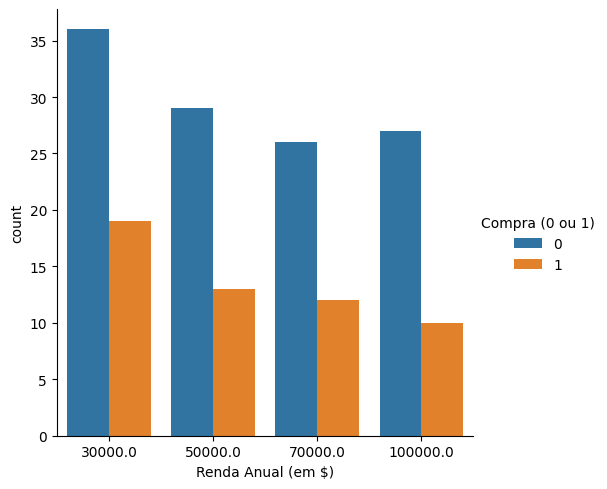

In [19]:
sns.catplot(x ="Renda Anual (em $)", hue ="Compra (0 ou 1)",
  kind ="count", data = data)

Já neste gráfico, vemos um leve aumento na distribuição de comprantes com tempo de site maior.

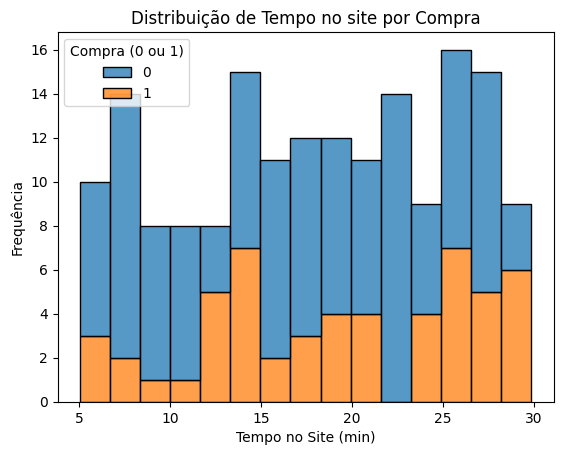

In [20]:
sns.histplot(data=data, x="Tempo no Site (min)", hue="Compra (0 ou 1)", kde=False, multiple="stack", bins = 15)

plt.title("Distribuição de Tempo no site por Compra")
plt.xlabel("Tempo no Site (min)")
plt.ylabel("Frequência")
plt.show()


Oque foi visto no gráfico anterior, é observado neste também. A mediana de tempo dos comprantes é um pouco maior, tal qual os quantis.

Text(0, 0.5, 'Tempo no Site')

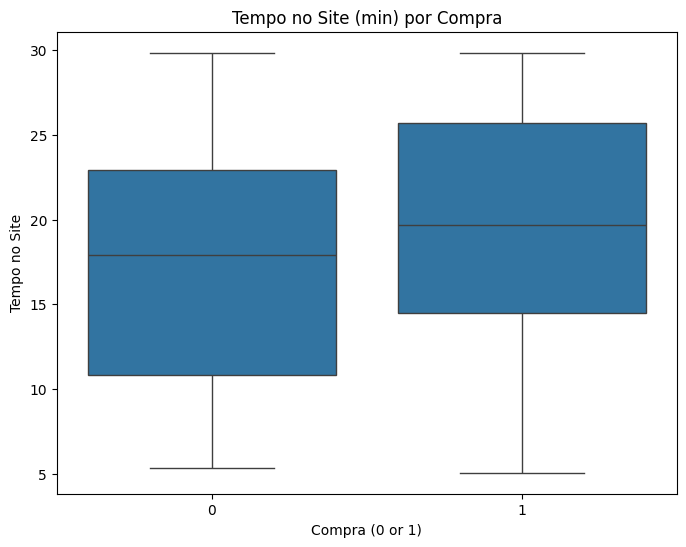

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Compra (0 ou 1)', y='Tempo no Site (min)')
plt.title('Tempo no Site (min) por Compra')
plt.xlabel('Compra (0 or 1)')
plt.ylabel('Tempo no Site')

Já para idade, não uma diferença clara na distribuição dos dados. No histograma vemos que não uma tendencia associada a eles e no box-plots as caixas são similares.

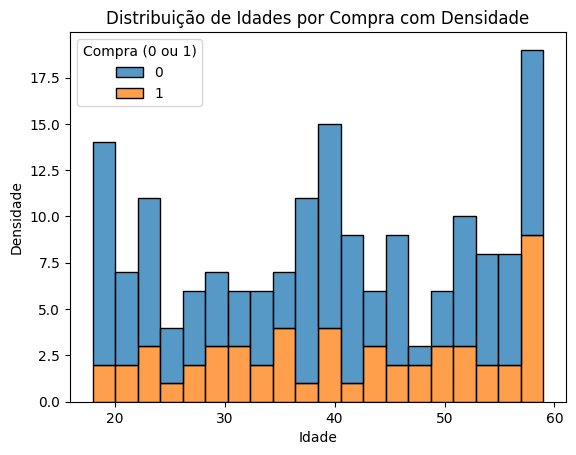

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data, x="Idade", hue="Compra (0 ou 1)", kde=False, multiple="stack", bins = 20)

plt.title("Distribuição de Idades por Compra com Densidade")
plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.show()


Text(0, 0.5, 'Idade')

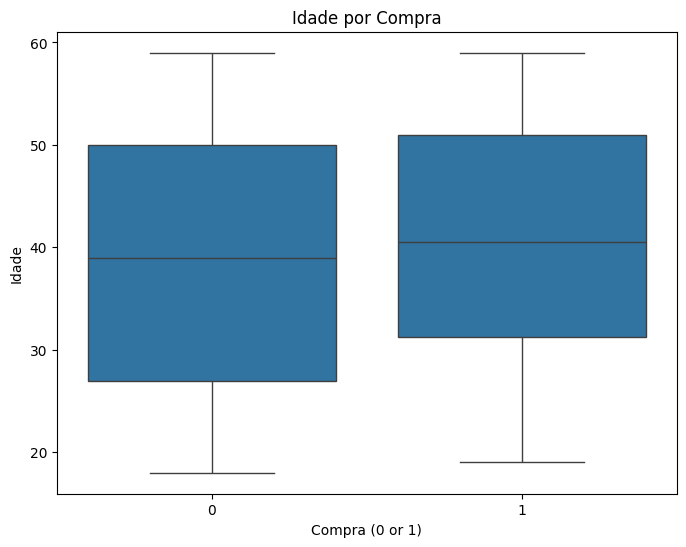

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Compra (0 ou 1)', y='Idade')
plt.title('Idade por Compra')
plt.xlabel('Compra (0 or 1)')
plt.ylabel('Idade')

Com anúncio clidado, temos um aumento na quantidade de venda.

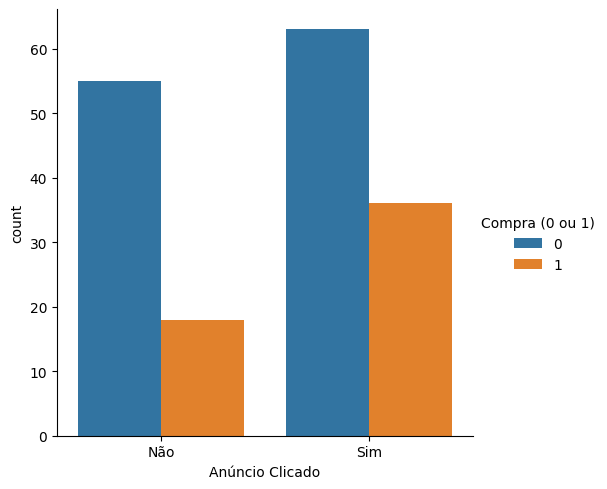

In [24]:
sns.catplot(x ="Anúncio Clicado", hue ="Compra (0 ou 1)",
  kind ="count", data = data)

Gênero não parece ser uma variável importante na decisão. Não a tirarei do modelo pois a interação dela com as outras variáveis pode ter algum impacto.

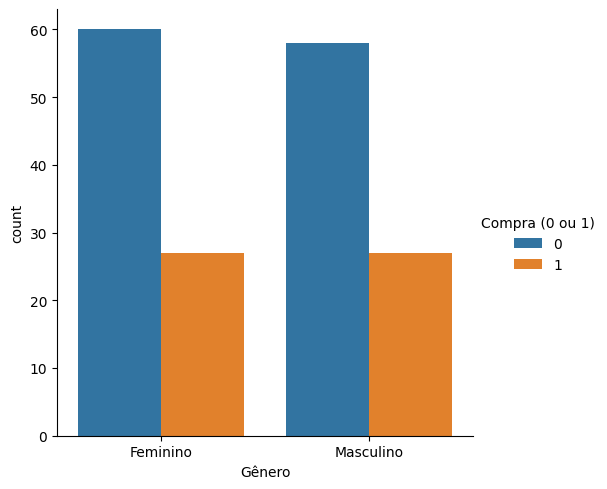

In [25]:
sns.catplot(x ="Gênero", hue ="Compra (0 ou 1)",
  kind ="count", data = data)

##Pré-processamento

In [26]:
# Definindo os intervalos para transformar em categórico rotulado por numeros
bins = [0, 40000, 60000, 80000, 120000]
labels = ['0', '1', '2', '3']

data_cat = data.copy()

# Criando a nova coluna
data_cat['Renda_Categorica'] = pd.cut(data['Renda Anual (em $)'], bins=bins, labels=labels)
data_cat = data_cat.drop(columns=['Renda Anual (em $)'])

In [27]:
data_cat.head()

,Idade,Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1),Renda_Categorica
0,29.0,Feminino,5.741706,Não,0,0
1,58.0,Feminino,21.885505,Sim,0,1
2,50.0,Feminino,6.121339,Não,1,2
3,21.0,Feminino,16.264925,Não,0,3
4,59.0,Feminino,28.235667,Sim,1,1


In [28]:
#Nessa parte do código, tranformei a variáveis gênero e anúncio em númericas

data_cat['Gênero'] = data_cat['Gênero'].map({'Feminino': 0, 'Masculino': 1})
data_cat['Anúncio Clicado'] = data_cat['Anúncio Clicado'].map({'Não': 0, 'Sim': 1})

data_cat = data_cat.rename(columns={'Gênero': 'Homem'})

data_cat.head()

,Idade,Homem,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1),Renda_Categorica
0,29.0,0,5.741706,0,0,0
1,58.0,0,21.885505,1,0,1
2,50.0,0,6.121339,0,1,2
3,21.0,0,16.264925,0,0,3
4,59.0,0,28.235667,1,1,1


In [29]:
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes e a variável resposta
X = data_cat.drop('Compra (0 ou 1)', axis=1)
y = data_cat['Compra (0 ou 1)']

# Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.preprocessing import LabelEncoder

# Utilizando o LabelEncoder, utilizei esse pois são dados categóricos ordinais
label_encoder = LabelEncoder()

X_train['Renda_Categorica'] = label_encoder.fit_transform(X_train['Renda_Categorica'])
X_test['Renda_Categorica'] = label_encoder.transform(X_test['Renda_Categorica'])

In [31]:
from sklearn.preprocessing import StandardScaler

#Aqui normalizei os dados para o modelo, utilizei a padronização para ficar com média = 0 e dp = 1

# Selecionando as colunas
columns_to_standardize = X_train.columns

# Criando o escalador Standard
scaler = StandardScaler()

# Padronizando apenas as colunas selecionadas
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])

In [32]:
X_train.head()

,Idade,Homem,Tempo no Site (min),Anúncio Clicado,Renda_Categorica
41,-0.150674,-1.022143,-1.331531,-1.184698,-1.170052
188,-0.150674,0.978337,0.918989,-1.184698,-0.294111
72,-0.944608,-1.022143,-1.527827,-1.184698,-0.294111
117,-0.785821,0.978337,-0.621107,-1.184698,0.581829
175,0.643261,0.978337,-0.052261,-1.184698,0.581829


In [33]:
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para balancear os dados de treinamento
smote = SMOTE(random_state=1)  # Defina uma semente aleatória para reprodutibilidade
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


##Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# Criando o modelo RandomForestClassifier, utilizei class_weight pois minhas classes estao desbalanceadas
rf_model = RandomForestClassifier()

# Treinando o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Fazendo previsões
y_pred = rf_model.predict(X_test)

#Avaliando conjunto de treinamento
erro = 1 - rf_model.score(X_train, y_train)
print(f"Erro no conjunto de treinamento: {erro:.2f}")

# Avaliando a performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Matriz de confusão e relatório de classificação
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Erro no conjunto de treinamento: 0.00
Acurácia: 0.60
Matriz de Confusão:
[[16  7]
 [ 7  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        23
           1       0.42      0.42      0.42        12

    accuracy                           0.60        35
   macro avg       0.56      0.56      0.56        35
weighted avg       0.60      0.60      0.60        35



In [37]:
from sklearn.model_selection import GridSearchCV

# Definir o grid de parâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Criar o modelo e o GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Treinar o modelo com a busca por hiperparâmetros
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliar o modelo
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia com GridSearchCV: {accuracy * 100:.2f}%")

erro = 1 - grid_search.best_estimator_.score(X_train, y_train)
print(f"Erro no conjunto de treinamento: {erro:.2f}")


Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Acurácia com GridSearchCV: 57.14%
Erro no conjunto de treinamento: 0.00


In [44]:
# Obter as importâncias das features
importances = rf_model.feature_importances_

# Combinar com os nomes das colunas
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordenar por importância
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
2,Tempo no Site (min),0.414946
0,Idade,0.322126
4,Renda_Categorica,0.147400
1,Homem,0.060886
3,Anúncio Clicado,0.054643


In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.46  # Ajustar para um valor menor que 0.5
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

print("\nRelatório de classificação (validação) com threshold ajustado:")
print(classification_report(y_test, y_pred_adjusted))

print("AUC na validação com threshold ajustado:", roc_auc_score(y_test, y_pred_adjusted))

print("\nMatriz de confusão (validação) com threshold ajustado:")
print(confusion_matrix(y_test, y_pred_adjusted))


Relatório de classificação (validação) com threshold ajustado:
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.38      0.42      0.40        12

    accuracy                           0.57        35
   macro avg       0.53      0.53      0.53        35
weighted avg       0.58      0.57      0.58        35

AUC na validação com threshold ajustado: 0.5344202898550725

Matriz de confusão (validação) com threshold ajustado:
[[15  8]
 [ 7  5]]


##Regressão Logistica

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Criar o modelo
log_reg_model = LogisticRegression(solver='liblinear', class_weight='balanced')

# Treinar o modelo com os dados de treinamento
log_reg_model.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred = log_reg_model.predict(X_test)

# Avaliar o desempenho
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Acurácia
accuracy = log_reg_model.score(X_test, y_test)
print(f"Acurácia: {accuracy * 100:.2f}%")

erro = 1 - log_reg_model.score(X_train, y_train)
print(f"Erro no conjunto de treinamento: {erro:.2f}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        23
           1       0.50      0.58      0.54        12

    accuracy                           0.66        35
   macro avg       0.63      0.64      0.63        35
weighted avg       0.67      0.66      0.66        35

Matriz de Confusão:
[[16  7]
 [ 5  7]]
Acurácia: 65.71%
Erro no conjunto de treinamento: 0.39


##PCA + Random Forest

In [45]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

In [46]:
from sklearn.preprocessing import StandardScaler

# Selecionando todas as colunas novamente para padrozinar
columns_to_standardize = X.columns

scaler = StandardScaler()

X_new = X.copy()

# Padronizando apenas as colunas selecionadas
X_new[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_cross, y_cross = smote.fit_resample(X_new, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [50]:
# Definindo o número de componentes principais
pca = PCA(n_components=0.95)  # Mantém 95% da variância

X_pca = pca.fit_transform(X_cross)

Melhor n: 29 AUC: 0.706060606060606


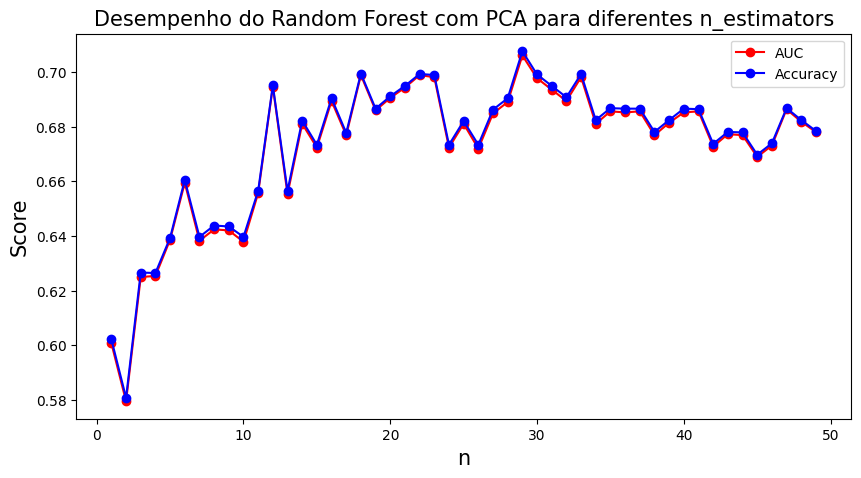

In [51]:
# Configuração do StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Variáveis para armazenar os resultados
mauc = []
macc = []
vn = []

# Loop para testar diferentes números de estimadores
for n in range(1, 50):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X_pca, y_cross):
        # Seleção das linhas usando Pandas
        x_t, x_validation = X_pca[train_index], X_pca[test_index]
        y_t, y_validation = y_cross.iloc[train_index], y_cross.iloc[test_index]

        # Treinamento do modelo
        model = RandomForestClassifier(n_estimators=n, random_state = 1)
        model.fit(x_t, y_t)

        # Previsões
        y_pred = model.predict(x_validation)

        # Cálculo das métricas
        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_validation, y_pred))

    # Média das métricas para cada valor de n
    mauc.append(np.mean(vauc))
    macc.append(np.mean(vacc))
    vn.append(n)

# Determinar o melhor número de estimadores
best_n = np.argmax(mauc) + 1
print('Melhor n:', best_n, 'AUC:', mauc[best_n-1])

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(vn, mauc, '-ro', label='AUC')
plt.plot(vn, macc, '-bo', label='Accuracy')
plt.xlabel('n', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.legend()
plt.title('Desempenho do Random Forest com PCA para diferentes n_estimators', fontsize=15)
plt.show()


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Definindo o modelo Random Forest
model_cross_pca = RandomForestClassifier(
    n_estimators= best_n,
    random_state=1
)


# Definindo a validação cruzada (10-fold cross-validation)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Avaliando o modelo usando cross-validation com AUC
auc_scores = cross_val_score(model_cross_pca, X_pca, y_cross, cv=cv, scoring='roc_auc')

# Avaliando o modelo usando cross-validation com Acurácia
accuracy_scores = cross_val_score(model_cross_pca, X_pca, y_cross, cv=cv, scoring='accuracy')

# Exibindo os resultados
print(f"AUC médio da validação cruzada: {np.mean(auc_scores):.4f}")
print(f"Acurácia média da validação cruzada: {np.mean(accuracy_scores):.4f}")



AUC médio da validação cruzada: 0.7705
Acurácia média da validação cruzada: 0.7076


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import recall_score, precision_score, f1_score
import numpy as np

# Definindo a validação cruzada (10-fold cross-validation)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Avaliando o modelo usando cross-validation com Recall
recall_scores = cross_val_score(model_cross_pca, X_pca, y_cross, cv=cv, scoring='recall')

# Avaliando o modelo usando cross-validation com Precision
precision_scores = cross_val_score(model_cross_pca, X_pca, y_cross, cv=cv, scoring='precision')

# Avaliando o modelo usando cross-validation com F1-Score
f1_scores = cross_val_score(model_cross_pca, X_pca, y_cross, cv=cv, scoring='f1')

# Exibindo os resultados
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores)
mean_f1 = np.mean(f1_scores)

print(f'Média Recall: {mean_recall:.4f}')
print(f'Média Precision: {mean_precision:.4f}')
print(f'Média F1-Score: {mean_f1:.4f}')


Média Recall: 0.7015
Média Precision: 0.7183
Média F1-Score: 0.6986


In [54]:
X_train_pca_p, X_test_pca_p, y_train_p, y_test_p = train_test_split(X_pca, y_cross, test_size=0.25, random_state=1)

In [55]:
from sklearn.metrics import accuracy_score, roc_auc_score

model_cross_pca.fit(X_train_pca_p, y_train_p)

y_pred = model_cross_pca.predict(X_test_pca_p)
y_pred_proba = model_cross_pca.predict_proba(X_test_pca_p)[:, 1]

accuracy = accuracy_score(y_test_p, y_pred)
auc = roc_auc_score(y_test_p, y_pred_proba)

print(f"Acurácia no conjunto de teste: {accuracy:.4f}")
print(f"AUC no conjunto de teste: {auc:.4f}")

print("Relatório de Classificação:")
print(classification_report(y_test_p, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test_p, y_pred))


Acurácia no conjunto de teste: 0.7288
AUC no conjunto de teste: 0.7435
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.79      0.70        24
           1       0.83      0.69      0.75        35

    accuracy                           0.73        59
   macro avg       0.73      0.74      0.73        59
weighted avg       0.75      0.73      0.73        59

Matriz de Confusão:
[[19  5]
 [11 24]]
